# Explorating Data Analysis

In [1]:
#Importing the requited libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading the data


In [2]:
data = pd.read_csv('C:/Users/apaul/Documents/impdocuments/CaseStudy/Data.csv',encoding = "ISO-8859-1")

data.head()

,Visitor_Identifier,Avg_Session_Duration,avg_time_on_page,Channel_Grouping,device_category,non_shopper,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,user_type,Lead _Form_submission
0,1.767882e+09,210.00,210.0,Paid Search,desktop,Yes,2.0,8,1,1,1,1,0,840,4,0,Returning Visitor,0
1,1.604589e+09,0.00,0.0,Paid Search,desktop,No,1.0,10,0,0,0,0,0,0,10,0,Returning Visitor,0
2,1.515450e+09,108.33,54.0,Paid Search,desktop,Yes,3.0,9,1,1,1,1,1,325,3,0,Returning Visitor,0
3,4.077739e+08,15.00,0.0,Paid Search,desktop,No,1.0,2,0,0,0,0,0,30,2,0,Returning Visitor,0
4,1.070705e+09,0.00,0.0,Paid Search,mobile,No,1.0,1,0,0,0,0,0,0,1,0,New Visitor,0


In [3]:
data.shape

(49420, 18)

In [4]:
#Drop the Constant Variables 

data1 = data.drop(['Visitor_Identifier','Channel_Grouping'
                     ],axis = 1)


# Correlation matrix

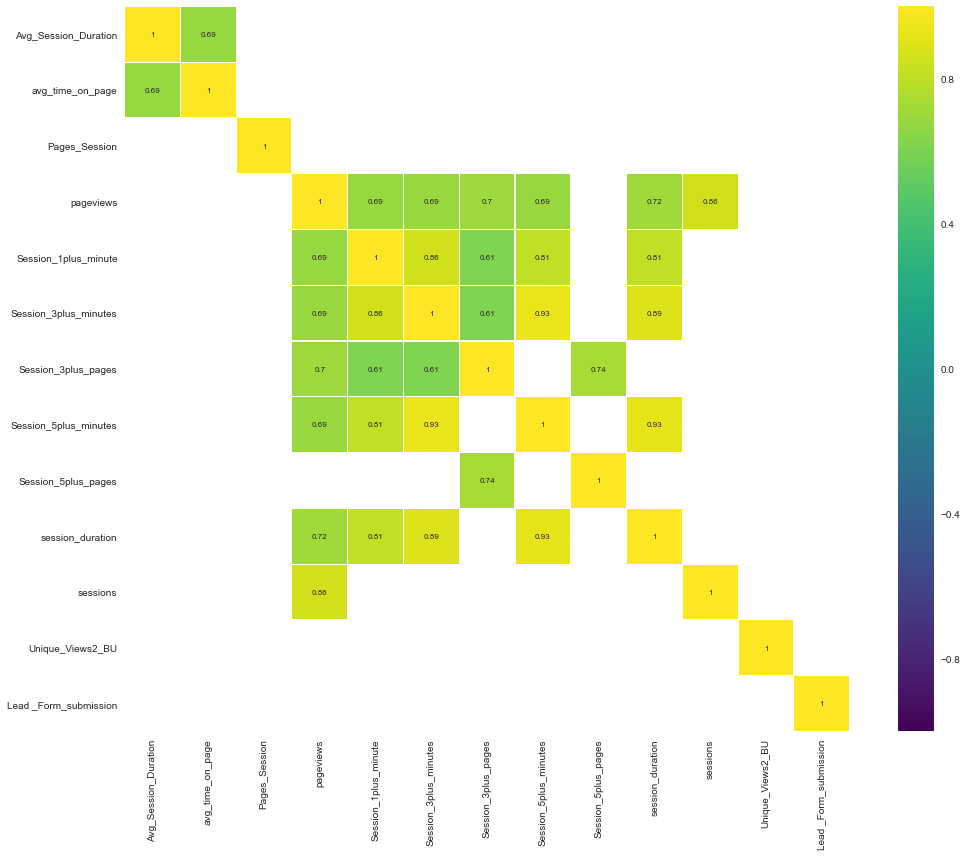

None

In [5]:
#create a correlation matrix
corr = data1.corr()  
plt.figure(figsize=(15, 12))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.tight_layout()
display(plt.show())

In [6]:
corr

,Avg_Session_Duration,avg_time_on_page,Pages_Session,pageviews,Session_1plus_minute,Session_3plus_minutes,Session_3plus_pages,Session_5plus_minutes,Session_5plus_pages,session_duration,sessions,Unique_Views2_BU,Lead _Form_submission
Avg_Session_Duration,1.000000,0.687368,0.440859,0.197695,0.432602,0.468437,0.258571,0.467881,0.246462,0.458367,0.055335,0.142446,0.285155
avg_time_on_page,0.687368,1.000000,0.229549,0.219999,0.435477,0.465408,0.129718,0.468211,0.079690,0.451036,0.171037,0.067231,0.263225
Pages_Session,0.440859,0.229549,1.000000,0.347996,0.370233,0.289197,0.462151,0.241478,0.486424,0.213617,0.041102,0.224320,0.322139
pageviews,0.197695,0.219999,0.347996,1.000000,0.685883,0.693246,0.703146,0.688524,0.585567,0.715413,0.857184,0.116375,0.072328
Session_1plus_minute,0.432602,0.435477,0.370233,0.685883,1.000000,0.855656,0.610633,0.806668,0.452418,0.810282,0.476244,0.130632,0.327676
Session_3plus_minutes,0.468437,0.465408,0.289197,0.693246,0.855656,1.000000,0.610726,0.932067,0.467996,0.894319,0.502868,0.126293,0.166547
Session_3plus_pages,0.258571,0.129718,0.462151,0.703146,0.610633,0.610726,1.000000,0.586422,0.737137,0.587124,0.342831,0.169580,0.079266
Session_5plus_minutes,0.467881,0.468211,0.241478,0.688524,0.806668,0.932067,0.586422,1.000000,0.453488,0.925927,0.512102,0.106276,0.098634
Session_5plus_pages,0.246462,0.079690,0.486424,0.585567,0.452418,0.467996,0.737137,0.453488,1.000000,0.453671,0.235360,0.208344,0.059543
session_duration,0.458367,0.451036,0.213617,0.715413,0.810282,0.894319,0.587124,0.925927,0.453671,1.000000,0.545800,0.099252,0.091567


In [8]:
#Removing Variables that are highly correlated:

In [7]:
data2 = data1.drop(['session_duration', 'Session_5plus_minutes', 'Session_3plus_minutes'],axis = 1)


In [8]:
data2.shape

(49420, 13)

In [11]:
#Checking the Null Variables:

In [9]:
data2.isnull().sum().sort_values(ascending=False)

Lead _Form_submission    0
user_type                0
Unique_Views2_BU         0
sessions                 0
Session_5plus_pages      0
Session_3plus_pages      0
Session_1plus_minute     0
pageviews                0
Pages_Session            0
non_shopper              0
device_category          0
avg_time_on_page         0
Avg_Session_Duration     0
dtype: int64

In [10]:
#### Checking the  Column Names:
for col in data2.columns: 
    print(col)

Avg_Session_Duration
avg_time_on_page
device_category
non_shopper
Pages_Session
pageviews
Session_1plus_minute
Session_3plus_pages
Session_5plus_pages
sessions
Unique_Views2_BU
user_type
Lead _Form_submission


# Checking the outliers

In [ ]:
#Checking the distribution of variable Avg_Session_Duration

In [11]:
data2['Avg_Session_Duration'].describe()


count    49420.000000
mean        38.668704
std        145.379037
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max       5144.500000
Name: Avg_Session_Duration, dtype: float64

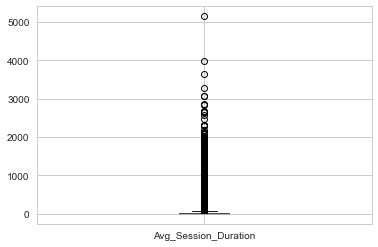

In [12]:
data2.boxplot(column='Avg_Session_Duration')
plt.show()

In [ ]:
#skewness :

In [13]:
data2['Avg_Session_Duration'].skew() 

9.605189474459305

# sqrt of Variable Avg_Session_Duration

In [14]:
data2['Avg_Session_DurationNew'] = np.sqrt(data2['Avg_Session_Duration'])  



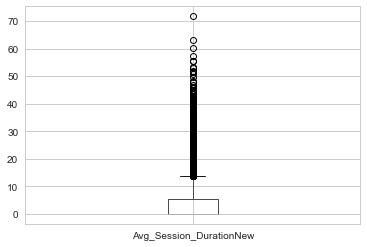

In [15]:
data2.boxplot(column='Avg_Session_DurationNew')
plt.show()

In [16]:
data2['Avg_Session_DurationNew'].describe()


count    49420.000000
mean         3.239376
std          5.308081
min          0.000000
25%          0.000000
50%          0.000000
75%          5.477226
max         71.725170
Name: Avg_Session_DurationNew, dtype: float64

In [17]:
data2['Avg_Session_DurationNew'].skew() #skewness is reduced

3.1785453218463866

In [ ]:
#Distribution of variable pageviews

In [18]:
data2['pageviews'].describe()


count    49420.000000
mean         1.655382
std          3.771735
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        340.000000
Name: pageviews, dtype: float64

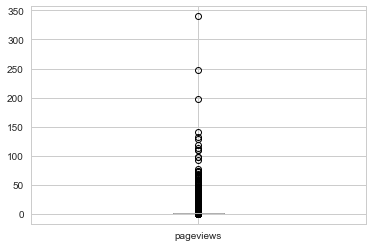

In [19]:
data2.boxplot(column='pageviews')
plt.show()

In [ ]:
#Skewness

In [20]:
data2['pageviews'].skew() 

32.963294994042954

# sqrt of Variable pageviews

In [21]:
data2['pageviewsNew'] = np.sqrt(data2['pageviews'])  



In [22]:
data2['pageviewsNew'].skew() 

6.993376523752228

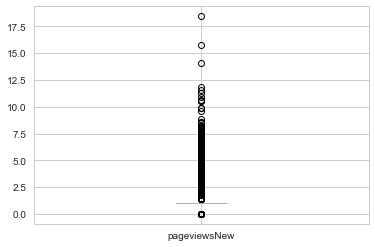

In [23]:
data2.boxplot(column='pageviewsNew')
plt.show()

In [24]:
data2['pageviewsNew'].describe()


count    49420.000000
mean         1.171411
std          0.532150
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         18.439089
Name: pageviewsNew, dtype: float64

In [ ]:
#Distribution of Variable avg_time_on_page

In [25]:
data2['avg_time_on_page'].describe()


count    49420.000000
mean        19.474152
std        100.682034
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3080.000000
Name: avg_time_on_page, dtype: float64

In [26]:

data2['avg_time_on_page'].skew() 

10.451198366710088

In [27]:
data2['avg_time_on_pageNew'] = np.sqrt(data2['avg_time_on_page'])  



In [28]:
data2['avg_time_on_pageNew'].describe()


count    49420.000000
mean         1.431410
std          4.174395
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         55.497748
Name: avg_time_on_pageNew, dtype: float64

In [29]:
data2['sessions'].describe()




count    49420.000000
mean         1.221307
std          2.318114
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        340.000000
Name: sessions, dtype: float64

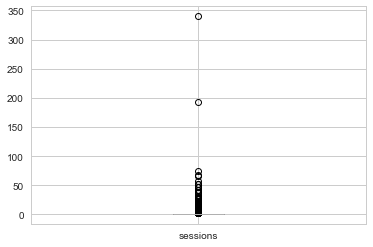

In [30]:
data2.boxplot(column='sessions')
plt.show()

# #Applying log10 transformation 


In [31]:
data2['sessionsNew'] = np.log10(data2['sessions'])  


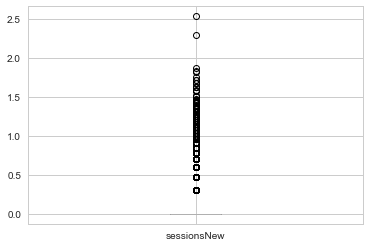

In [32]:
data2.boxplot(column='sessionsNew')
plt.show()

In [33]:
data2['sessionsNew'].describe()




count    49420.000000
mean         0.032183
std          0.144392
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.531479
Name: sessionsNew, dtype: float64

In [34]:
#### Checking the  Column Names:
for col in data2.columns: 
    print(col)

Avg_Session_Duration
avg_time_on_page
device_category
non_shopper
Pages_Session
pageviews
Session_1plus_minute
Session_3plus_pages
Session_5plus_pages
sessions
Unique_Views2_BU
user_type
Lead _Form_submission
Avg_Session_DurationNew
pageviewsNew
avg_time_on_pageNew
sessionsNew


In [ ]:
#Choosing the final variables:

In [36]:
cols=['device_category', 'non_shopper', 'Pages_Session', 'Session_1plus_minute',
     'Session_3plus_pages', 'Session_5plus_pages', 'Unique_Views2_BU', 'user_type', 'Lead _Form_submission',
      'Avg_Session_DurationNew',
     'pageviewsNew', 'avg_time_on_pageNew', 'sessionsNew']
dataset_final = data2[cols]

    

In [37]:
#Creating Dummy variables 

dataset_final = pd.get_dummies(dataset_final, columns =['device_category','non_shopper' ,'user_type'
                                      ])

In [38]:
#### Checking the  Column Names:
for col in dataset_final.columns: 
    print(col)

Pages_Session
Session_1plus_minute
Session_3plus_pages
Session_5plus_pages
Unique_Views2_BU
Lead _Form_submission
Avg_Session_DurationNew
pageviewsNew
avg_time_on_pageNew
sessionsNew
device_category_desktop
device_category_mobile
device_category_tablet
non_shopper_No
non_shopper_Yes
user_type_New Visitor
user_type_Returning Visitor


In [39]:
dataset_final=dataset_final.drop(['device_category_tablet', 'non_shopper_No', 'user_type_New Visitor'], axis=1)

In [40]:
#### Checking the  Column Names:
for col in dataset_final.columns: 
    print(col)

Pages_Session
Session_1plus_minute
Session_3plus_pages
Session_5plus_pages
Unique_Views2_BU
Lead _Form_submission
Avg_Session_DurationNew
pageviewsNew
avg_time_on_pageNew
sessionsNew
device_category_desktop
device_category_mobile
non_shopper_Yes
user_type_Returning Visitor


In [41]:
dataset_final.shape

(49420, 14)

# Using Random Forest for Variable selection: Method RFECV


In [44]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

X1 = dataset_final.drop('Lead _Form_submission', axis=1)
target = dataset_final['Lead _Form_submission']



In [45]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X1, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [46]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 10


In [47]:
# print out which features are considered to be least important
print(np.where(rfecv.support_ == False)[0])

X1.drop(X1.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 2  3 10]


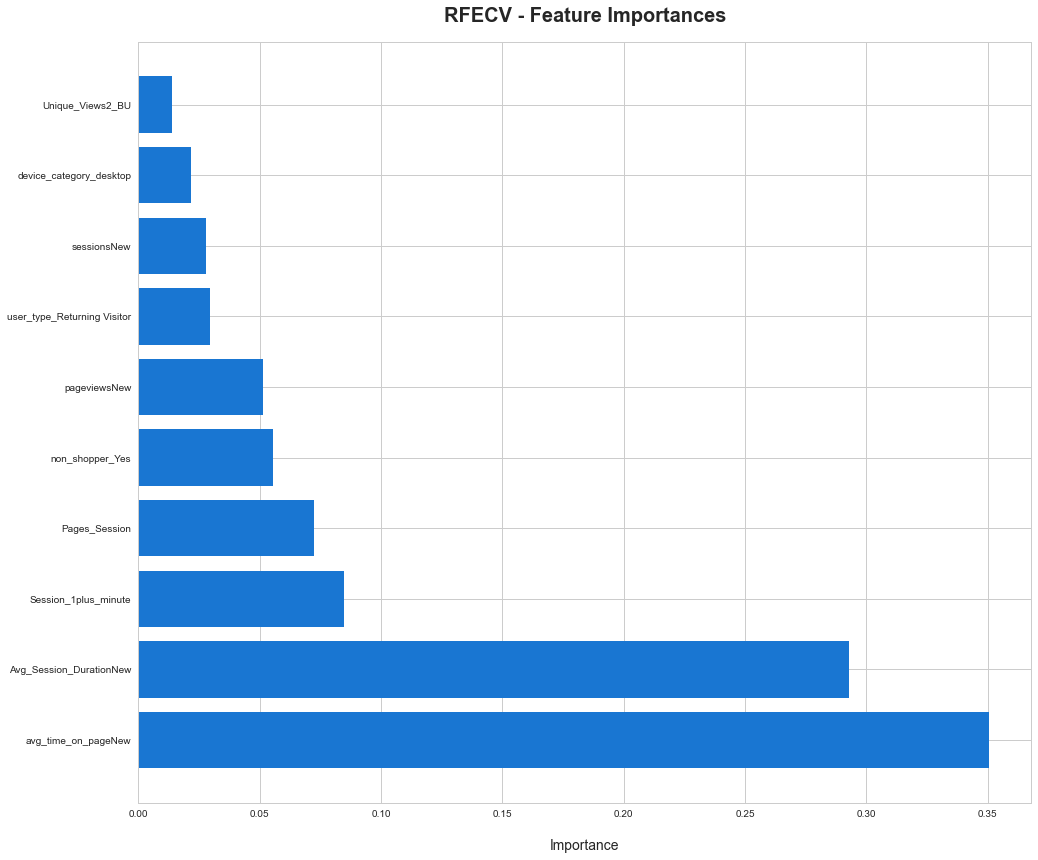

In [48]:
dset = pd.DataFrame()
dset['attr'] = X1.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [42]:
X = dataset_final.drop(['Lead _Form_submission'], axis = 1)
Y= dataset_final['Lead _Form_submission']

# #Dividing the dataset into training and testing


In [43]:
#Dividing the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1) # 80% training and 20% test


In [44]:
train = pd.concat([X_train,y_train] , axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [45]:
train.shape


(34594, 14)

In [46]:
test.shape

(14826, 14)

# Applying Linear Regression Model:

In [47]:
from sklearn.linear_model import LogisticRegression


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
result=lr.fit(X_train,y_train)

C:\Users\apaul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
print(result.coef_)

[[ 1.41591122  3.01295595 -1.29146927 -2.96800093  0.3545027  -0.08037469
  -1.90449821  0.16121088 -2.48738499  0.31109004 -0.09901633 -1.96785242
  -0.12019843]]


In [49]:
preds = lr.predict(X_train)
print(preds)

[0 0 0 ... 0 0 0]


In [50]:
#Confusion matrix:

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, preds))

[[32994   344]
 [  961   295]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_train,preds))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     33338
           1       0.46      0.23      0.31      1256

    accuracy                           0.96     34594
   macro avg       0.72      0.61      0.65     34594
weighted avg       0.95      0.96      0.96     34594



In [52]:
pred_prob_train = lr.predict_proba(X_train)

In [53]:
pred_prob_train = pd.DataFrame(pred_prob_train)

In [54]:
#Rename the column "1" as Pred_Prob

pred_prob_train.rename(columns = {1:'Pred_Prob'}, inplace = True) 

In [55]:
dataframe_train=pd.DataFrame(preds, columns=['Pred_Submission']) 


In [56]:
train = train.reset_index()

In [57]:
#join the final result it train set


results_train = pd.concat([train, dataframe_train, pred_prob_train], axis = 1)
results_train.shape

(34594, 18)

In [ ]:
#results_train.to_csv('CaseStudy25Dec.csv', encoding = "ISO-8859-1")

In [58]:
#Coefficients for logistic regression:

coeff=result.coef_
coeff

array([[ 1.41591122,  3.01295595, -1.29146927, -2.96800093,  0.3545027 ,
        -0.08037469, -1.90449821,  0.16121088, -2.48738499,  0.31109004,
        -0.09901633, -1.96785242, -0.12019843]])

In [59]:
coeff = pd.DataFrame(coeff)

In [60]:
coeff=coeff.transpose()


In [61]:
for col in X_train.columns: 
    print(col) 


Pages_Session
Session_1plus_minute
Session_3plus_pages
Session_5plus_pages
Unique_Views2_BU
Avg_Session_DurationNew
pageviewsNew
avg_time_on_pageNew
sessionsNew
device_category_desktop
device_category_mobile
non_shopper_Yes
user_type_Returning Visitor


In [62]:
colnames=X_train.columns

In [63]:
#Column names of the training set 
colnames = pd.DataFrame(colnames)
colnames 

,0
0,Pages_Session
1,Session_1plus_minute
2,Session_3plus_pages
3,Session_5plus_pages
4,Unique_Views2_BU
5,Avg_Session_DurationNew
6,pageviewsNew
7,avg_time_on_pageNew
8,sessionsNew
9,device_category_desktop


In [64]:

#merging the column names and their respective coeff

coeff_columns=pd.concat([coeff,colnames ], axis = 1)
coeff_columns

,0,0
0,1.415911,Pages_Session
1,3.012956,Session_1plus_minute
2,-1.291469,Session_3plus_pages
3,-2.968001,Session_5plus_pages
4,0.354503,Unique_Views2_BU
5,-0.080375,Avg_Session_DurationNew
6,-1.904498,pageviewsNew
7,0.161211,avg_time_on_pageNew
8,-2.487385,sessionsNew
9,0.311090,device_category_desktop


In [65]:
#Intercept

In [66]:
print(result.intercept_)

[-4.61344556]


In [67]:
#Test result for the logistic regrtession on the selected variables:

In [68]:
predstest = lr.predict(X_test)
print(predstest)

[0 0 0 ... 0 0 0]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predstest))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14277
           1       0.44      0.21      0.29       549

    accuracy                           0.96     14826
   macro avg       0.70      0.60      0.63     14826
weighted avg       0.95      0.96      0.95     14826



In [70]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predstest))

[[14129   148]
 [  433   116]]


In [71]:
pred_probTest = lr.predict_proba(X_test)

In [74]:
pred_probTest.rename(columns = {1:'Pred_Prob'}, inplace = True) 
pred_probTest

,0,Pred_Prob
0,0.991764,0.008236
1,0.996490,0.003510
2,0.995329,0.004671
3,0.993331,0.006669
4,0.994681,0.005319
...,...,...
14821,0.996153,0.003847
14822,0.991764,0.008236
14823,0.991764,0.008236
14824,0.994519,0.005481


In [75]:
test = test.reset_index()